Data Cleaning

In [ ]:
import pandas as pd
from data_preprocessing import preprocess      

movie_details = pd.read_json("IMDB_movie_details.json", lines=True)
reviews       = pd.read_json("IMDB_reviews.json",         lines=True)

merged_df = preprocess(movie_details, reviews)

merged_df.to_csv("imdb_cleaned.csv", index=False)

## Model

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

In [ ]:

train_df, test_df = train_test_split(
    merged_df,                      
    test_size=0.20,                
    random_state=42,           
    stratify=merged_df["is_spoiler"] 
)

X_train_reviews = train_df["review_text"].fillna("") 
X_test_reviews  = test_df["review_text"].fillna("")   

y_train = train_df["is_spoiler"]
y_test  = test_df["is_spoiler"]


In [4]:
X_train_reviews.head()

94625     maltese falcon film noir based novel title das...
89585     water scarce resource dispensed made available...
187840    really expecting lot given hype wow overrated ...
265694    movie awful scary characters dull plot told ac...
125407    town excellent film flaws however one best fil...
Name: review_text, dtype: object

    Fit a text‑classification pipeline

In [ ]:
def train_and_evaluate(
        X_train_text, y_train,
        X_test_text,  y_test,
        vectorizer, model,
        name: str
    ):

    print(f"\nModel: {name}")
    X_train_vec = vectorizer.fit_transform(X_train_text)
    X_test_vec  = vectorizer.transform(X_test_text)


    model.fit(X_train_vec, y_train)

    y_pred_train = model.predict(X_train_vec)
    y_pred_test  = model.predict(X_test_vec)

    print("TRAIN PERFORMANCE")
    print(classification_report(y_train, y_pred_train))

    print("TEST PERFORMANCE")
    print(classification_report(y_test, y_pred_test))

    return model, vectorizer


    Return the words (or n‑grams) that a fitted binary LogisticRegression
    thinks are most indicative of spoilers vs non‑spoilers.

In [ ]:
def top_features_logreg(model, vectorizer, top_n: int = 20):

    feature_names = np.array(vectorizer.get_feature_names_out())


    coefs = model.coef_[0]                  # shape: (n_features,)


    top_pos_idx = np.argsort(coefs)[-top_n:][::-1]  # largest → smallest
    top_neg_idx = np.argsort(coefs)[:top_n]         # most negative


    top_spoiler_words     = feature_names[top_pos_idx].tolist()
    top_non_spoiler_words = feature_names[top_neg_idx].tolist()

    return top_spoiler_words, top_non_spoiler_words


### Count vectorizer

 Define the text vectoriser and classifier

In [ ]:
count_vec = CountVectorizer()           
logreg     = LogisticRegression(max_iter=1000)


model_lr_cntvec, lr_fitted_count_vec = train_and_evaluate(
    X_train_reviews, y_train,         
    X_test_reviews,  y_test,           
    count_vec, logreg,                 
    "CountVec + Logistic Regression"   
)


top_lr_cntvec_features = top_features_logreg(
    model_lr_cntvec,      
    lr_fitted_count_vec,  

)


print("Likely SPOILER cues:     ", top_lr_cntvec_features[0])
print("Likely NON‑spoiler cues: ", top_lr_cntvec_features[1])


Model: CountVec + Logistic Regression


c:\Users\zhang\anaconda3\envs\cs3244\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       False       0.91      0.99      0.95    338391
        True       0.96      0.73      0.83    120739

    accuracy                           0.92    459130
   macro avg       0.93      0.86      0.89    459130
weighted avg       0.92      0.92      0.92    459130

              precision    recall  f1-score   support

       False       0.80      0.90      0.85     84598
        True       0.57      0.38      0.45     30185

    accuracy                           0.76    114783
   macro avg       0.69      0.64      0.65    114783
weighted avg       0.74      0.76      0.74    114783

['swillikycom', 'revronmoviesblogspotcom', 'yidioo', 'starswwwfilmnomenonblogspotcomall', '3guys1moviecom', 'coulardeau', 'dir', 'spoilersi', 'seaton', 'spoilersfirst', 'wwwfilmnomenonblogspotcom', 'spoilerswhat', 'wwwcultfilmfreakscom', 'neverthelessit', 'spoilersafter', 'znake', 'spoilersits', 'spoilersthis', 'ddkrating', 'spoilerthis']
['wil

### TF-IDF

In [8]:
tfidf_vec = TfidfVectorizer()
logreg2 = LogisticRegression(max_iter=1000)

model_lr_tfidf, lr_fitted_tfidf_vec = train_and_evaluate(
    X_train_reviews, y_train, X_test_reviews, y_test,
    tfidf_vec, logreg2, "TFIDF + Logistic Regression"
)

top_lr_tfidf_features = top_features_logreg(model_lr_tfidf, lr_fitted_tfidf_vec)
print(top_lr_tfidf_features[0])
print(top_lr_tfidf_features[1])

Model: TFIDF + Logistic Regression
              precision    recall  f1-score   support

       False       0.81      0.95      0.88    338391
        True       0.74      0.38      0.50    120739

    accuracy                           0.80    459130
   macro avg       0.77      0.67      0.69    459130
weighted avg       0.79      0.80      0.78    459130

              precision    recall  f1-score   support

       False       0.80      0.93      0.86     84598
        True       0.65      0.35      0.45     30185

    accuracy                           0.78    114783
   macro avg       0.72      0.64      0.66    114783
weighted avg       0.76      0.78      0.75    114783

['spoiler', 'spoilers', 'dir', 'spoilersi', 'spoilersthe', 'dies', 'spoilersthis', 'killed', 'alert', 'bafta', 'died', 'swillikycom', 'realises', 'end', 'incest', 'scene', 'seaton', 'warning', 'survives', 'contain']
['greetings', 'bethany', 'cliches', 'definately', 'likeable', 'brazil', 'alot', 'cliche', 'clic

In [9]:
top_lr_tfidf_features = top_features_logreg(model_lr_tfidf, lr_fitted_tfidf_vec, top_n=100)


### Visualization of strong words

In [ ]:

glove_path = "glove.6B/glove.6B.100d.txt"
glove_embeddings = {}

with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split()
        word = parts[0]
        vec = np.array(parts[1:], dtype=np.float32)
        glove_embeddings[word] = vec

In [11]:
def get_word_vectors(words, embedding_dict):
    vectors = []
    valid_words = []

    for word in words:
        if word in embedding_dict:
            vectors.append(embedding_dict[word])
            valid_words.append(word)

    return np.array(vectors), valid_words

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_word_embeddings(words, label, color):
    vectors, valid_words = get_word_vectors(words, glove_embeddings)

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.scatter(reduced[:, 0], reduced[:, 1], label=label, alpha=0.7, c=color)

    # Annotate points
    for i, word in enumerate(valid_words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]), fontsize=9)

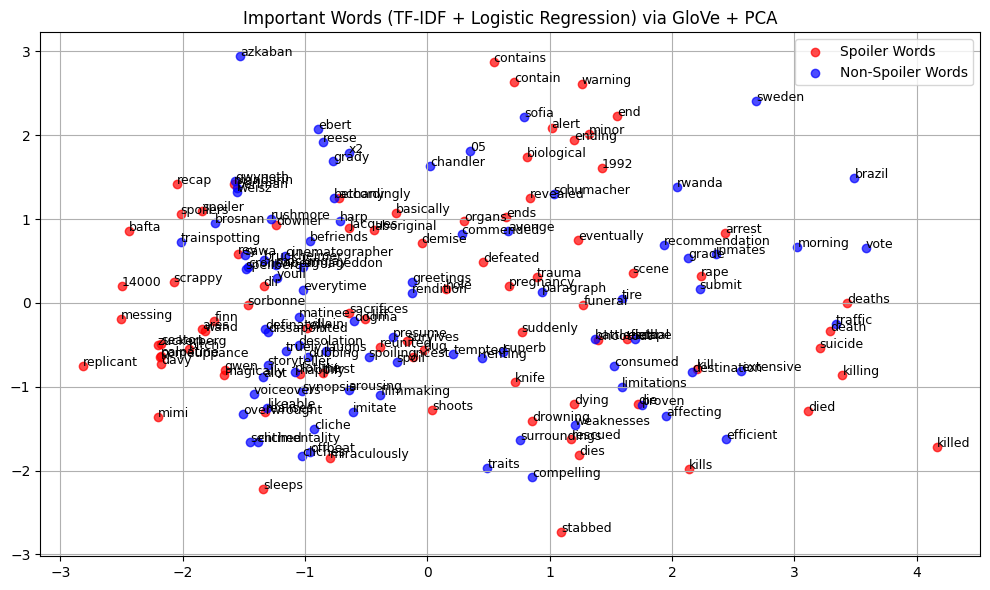

In [13]:
plt.figure(figsize=(10, 6))
plot_word_embeddings(top_lr_tfidf_features[0], label="Spoiler Words", color="red")
plot_word_embeddings(top_lr_tfidf_features[1], label="Non-Spoiler Words", color="blue")
plt.title("Important Words (TF-IDF + Logistic Regression) via GloVe + PCA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Non-text model

In [ ]:
drop_cols = [
    'review_summary', 'plot_summary', 'review_date', 'duration',
    'movie_id', 'user_id', 'is_spoiler', 'review_text',
    'release_date', 'plot_synopsis'
]

X_train_tabular = train_df.drop(columns=drop_cols, errors='ignore')
X_test_tabular = test_df.drop(columns=drop_cols, errors='ignore')

y_train = train_df['is_spoiler']
y_test = test_df['is_spoiler']


X_train_tabular = X_train_tabular.applymap(lambda x: len(x) if isinstance(x, list) else x)
X_test_tabular  = X_test_tabular.applymap(lambda x: len(x) if isinstance(x, list) else x)


X_train_tabular = X_train_tabular.fillna(0)
X_test_tabular = X_test_tabular.fillna(0)

C:\Users\zhang\AppData\Local\Temp\ipykernel_34644\634876105.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train_tabular = X_train_tabular.applymap(lambda x: len(x) if isinstance(x, list) else x)
C:\Users\zhang\AppData\Local\Temp\ipykernel_34644\634876105.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test_tabular  = X_test_tabular.applymap(lambda x: len(x) if isinstance(x, list) else x)


In [18]:
X_train_tabular.head()

,rating_review,days_since_review,genre,rating_movie,days_since_release,Action,Adventure,Animation,Biography,Comedy,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,duration_min,has_summary,has_synopsis
94625,10,4560,2.0,8.1,30500.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1,1
89585,1,3614,3.0,8.1,3628.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,1,1
187840,5,4071,2.0,7.3,4139.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,1,1
265694,1,2778,3.0,7.6,2781.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,135.0,1,1
125407,7,5218,3.0,7.6,5329.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,125.0,1,1


In [19]:
logreg_tabular = LogisticRegression(max_iter=2000)
logreg_tabular.fit(X_train_tabular, y_train)

y_pred_logreg = logreg_tabular.predict(X_test_tabular)
print(classification_report(y_train, logreg_tabular.predict(X_train_tabular)))
print(classification_report(y_test, y_pred_logreg))

c:\Users\zhang\anaconda3\envs\cs3244\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       False       0.74      0.99      0.85    338391
        True       0.40      0.01      0.02    120739

    accuracy                           0.74    459130
   macro avg       0.57      0.50      0.44    459130
weighted avg       0.65      0.74      0.63    459130

              precision    recall  f1-score   support

       False       0.74      0.99      0.85     84598
        True       0.39      0.01      0.02     30185

    accuracy                           0.74    114783
   macro avg       0.56      0.50      0.43    114783
weighted avg       0.65      0.74      0.63    114783



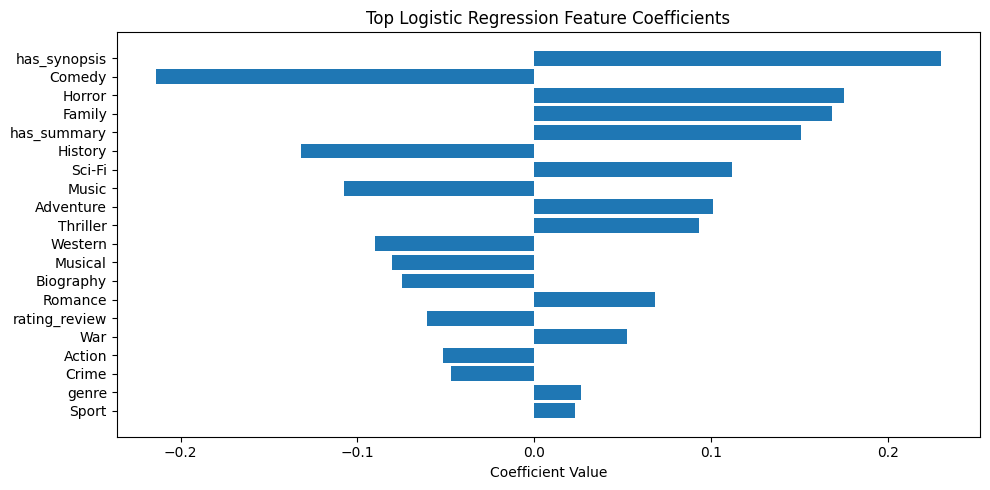

In [20]:
def plot_logreg_feature_importance(model, feature_names, top_n=20):
    coefs = model.coef_[0]
    indices = np.argsort(np.abs(coefs))[-top_n:][::-1]
    plt.figure(figsize=(10, 5))
    plt.barh(range(top_n), coefs[indices], align='center')
    plt.yticks(range(top_n), [feature_names[i] for i in indices])
    plt.gca().invert_yaxis()
    plt.title("Top Logistic Regression Feature Coefficients")
    plt.xlabel("Coefficient Value")
    plt.tight_layout()
    plt.show()

plot_logreg_feature_importance(logreg_tabular, X_train_tabular.columns)

In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tabular, y_train)

y_pred_xgb = xgb.predict(X_test_tabular)
print(classification_report(y_train, xgb.predict(X_train_tabular)))
print(classification_report(y_test, y_pred_xgb))


c:\Users\zhang\anaconda3\envs\cs3244\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:48:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

       False       0.74      0.99      0.85    338391
        True       0.62      0.04      0.08    120739

    accuracy                           0.74    459130
   macro avg       0.68      0.52      0.46    459130
weighted avg       0.71      0.74      0.65    459130

              precision    recall  f1-score   support

       False       0.74      0.99      0.85     84598
        True       0.54      0.04      0.07     30185

    accuracy                           0.74    114783
   macro avg       0.64      0.51      0.46    114783
weighted avg       0.69      0.74      0.64    114783



<Figure size 1000x500 with 0 Axes>

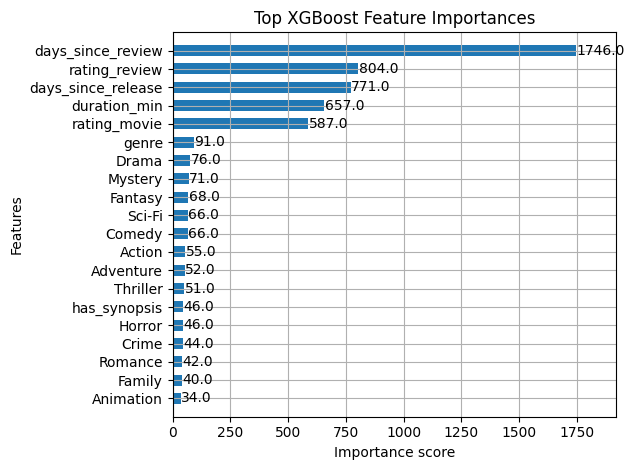

In [22]:
from xgboost import plot_importance

plt.figure(figsize=(10, 5))
plot_importance(xgb, max_num_features=20, height=0.6)
plt.title("Top XGBoost Feature Importances")
plt.tight_layout()
plt.show()

## LDA + XGboost

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

train_lda_tabular = train_df
test_lda_tabular = test_df

vec = CountVectorizer(max_features=5000, stop_words='english')
X_train_bow = vec.fit_transform(train_df["review_text"].fillna(""))

lda = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=42)
X_train_lda = lda.fit_transform(X_train_bow)

X_test_bow = vec.transform(test_df["review_text"].fillna(""))
X_test_lda = lda.transform(X_test_bow)

for i in range(X_train_lda.shape[1]):
    train_lda_tabular[f"topic_{i}"] = X_train_lda[:, i]
    test_lda_tabular[f"topic_{i}"] = X_test_lda[:, i]


In [24]:
train_lda_tabular.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating_review,review_summary,days_since_review,plot_summary,duration,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
94625,2012-10-25,tt0033870,ur5291991,True,maltese falcon film noir based novel title das...,10,classic detective thriller,4560,spade archer name san francisco detective agen...,1h 40min,...,0.000834,0.238125,0.025065,0.303974,0.000834,0.000834,0.029823,0.000833,0.233330,0.166349
89585,2015-05-29,tt1392190,ur48053412,True,water scarce resource dispensed made available...,1,plot spoilers,3614,apocalyptic story set furthest reaches planet ...,2h,...,0.736020,0.001299,0.071455,0.001299,0.001299,0.107730,0.077001,0.001299,0.001299,0.001299
187840,2014-02-26,tt1800241,ur28438054,True,really expecting lot given hype wow overrated ...,5,overrated film 2013,4071,fictional film set alluring world one stunning...,2h 18min,...,0.065977,0.001111,0.001111,0.001111,0.050316,0.618923,0.001111,0.054685,0.104667,0.100986
265694,2017-09-11,tt1396484,ur35553121,False,movie awful scary characters dull plot told ac...,1,waste oxygen,2778,town derry local kids disappearing one one lea...,2h 15min,...,0.003226,0.003227,0.045373,0.003226,0.003226,0.832197,0.003226,0.003227,0.099844,0.003226
125407,2011-01-06,tt0840361,ur14069613,False,town excellent film flaws however one best fil...,7,entertaining heist film,5218,charlestown neighborhood boston renowned churn...,2h 5min,...,0.000565,0.000565,0.000565,0.247657,0.000565,0.220988,0.486406,0.000565,0.041559,0.000565


In [ ]:

drop_cols = [
    'review_summary', 'plot_summary', 'review_date', 'duration',
    'movie_id', 'user_id', 'is_spoiler', 'review_text',
    'release_date', 'plot_synopsis', 'top_topic'
]

X_train_lda_tabular = train_lda_tabular.drop(columns=drop_cols, errors='ignore')
X_test_lda_tabular = test_lda_tabular.drop(columns=drop_cols, errors='ignore')

y_train = train_lda_tabular["is_spoiler"]
y_test = test_lda_tabular["is_spoiler"]

X_train_lda_tabular = X_train_lda_tabular.fillna(0)
X_test_lda_tabular = X_test_lda_tabular.fillna(0)

def list_len_or_self(x):
    """Return len(x) if x is a list; otherwise return x unchanged."""
    return len(x) if isinstance(x, list) else x

X_train_lda_tabular = X_train_lda_tabular.applymap(list_len_or_self)
X_test_lda_tabular  = X_test_lda_tabular.applymap(list_len_or_self)

X_train_lda_tabular = X_train_lda_tabular.astype(float)
X_test_lda_tabular  = X_test_lda_tabular.astype(float)





C:\Users\zhang\AppData\Local\Temp\ipykernel_34644\3332362954.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train_lda_tabular = X_train_lda_tabular.applymap(list_len_or_self)
C:\Users\zhang\AppData\Local\Temp\ipykernel_34644\3332362954.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test_lda_tabular  = X_test_lda_tabular.applymap(list_len_or_self)


In [ ]:
from xgboost import XGBClassifier

xgb_lda = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_lda.fit(X_train_lda_tabular, y_train)

y_pred_xgb = xgb_lda.predict(X_test_lda_tabular)
print(classification_report(y_train, xgb_lda.predict(X_train_lda_tabular)))
print(classification_report(y_test, y_pred_xgb))


c:\Users\zhang\anaconda3\envs\cs3244\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:07:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

       False       0.78      0.96      0.86    338391
        True       0.67      0.25      0.37    120739

    accuracy                           0.77    459130
   macro avg       0.73      0.60      0.61    459130
weighted avg       0.75      0.77      0.73    459130

              precision    recall  f1-score   support

       False       0.77      0.95      0.85     84598
        True       0.59      0.22      0.32     30185

    accuracy                           0.76    114783
   macro avg       0.68      0.58      0.59    114783
weighted avg       0.73      0.76      0.71    114783



<Figure size 1000x500 with 0 Axes>

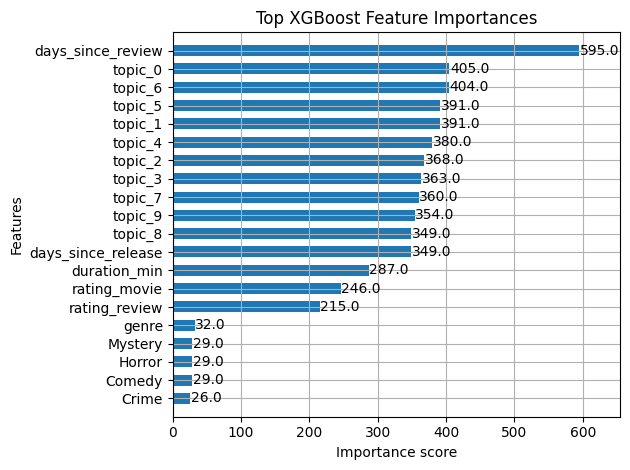

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plot_importance(xgb_lda, max_num_features=20, height=0.6)
plt.title("Top XGBoost Feature Importances")
plt.tight_layout()
plt.show()

In [30]:
def print_top_words(lda_model, vectorizer, n_top_words=10):
    words = vectorizer.get_feature_names_out()
    for i, topic in enumerate(lda_model.components_):
        top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {i}: {' | '.join(top_words)}")


In [31]:
print_top_words(lda, vec)

train_df["top_topic"] = X_train_lda.argmax(axis=1)
topic_1_examples = train_df[train_df["top_topic"] == 1]["review_text"].sample(5)
for review in topic_1_examples:
    print("------\n", review)

Topic 0: film | like | people | story | way | life | world | character | characters | make
Topic 1: family | young | life | father | children | old | love | girl | son | mother
Topic 2: action | effects | star | series | new | special | original | like | comic | good
Topic 3: movie | best | war | performance | great | bond | oscar | film | role | actor
Topic 4: funny | comedy | fun | like | love | good | humor | character | great | film
Topic 5: movie | like | good | really | movies | dont | think | time | watch | great
Topic 6: film | films | story | great | characters | good | character | scenes | acting | time
Topic 7: horror | batman | dark | original | scary | acted | robin | joker | burton | dead
Topic 8: jack | man | life | michael | johnny | hes | depp | prison | crime | tim
Topic 9: film | director | american | scene | violence | art | hollywood | work | films | novel
------
 teaching son morality ethics admirable endeavor least rooted realism feasibility many illogical scenar

In [32]:
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()

pyLDAvis.lda_model.prepare(
    lda, X_train_bow, vec,
    mds='pcoa',
    n_jobs=1
)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.171244  0.021860       1        1  29.717263
0      0.124671  0.087122       2        1  16.973955
6      0.193993 -0.118844       3        1  11.624085
9      0.067972  0.041188       4        1   9.888679
2     -0.011301 -0.067702       5        1   7.874381
4      0.020328 -0.009167       6        1   7.663807
1     -0.173779  0.250957       7        1   5.787590
3      0.059881 -0.059267       8        1   5.282453
8     -0.182835  0.145941       9        1   3.228075
7     -0.270174 -0.292088      10        1   1.959711, topic_info=             Term          Freq         Total Category  logprob  loglift
1710         film  8.129610e+05  8.129610e+05  Default  30.0000  30.0000
2958        movie  1.094774e+06  1.094774e+06  Default  29.0000  29.0000
123        action  1.439070e+05  1.439070e+05  Default  28.0000  28.0000
473          best  1.839840e+05  1.839840e+05  Default  27.0000  27.0000
1965        great  2.534850e+05  2.534850e+05  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
450        begins  5.827474e+03  1.863681e+04  Topic10  -4.9779   2.7698
601      brothers  5.052234e+03  1.450642e+04  Topic10  -5.1206   2.8776
509         blood  5.186832e+03  1.777827e+04  Topic10  -5.0943   2.7005
3032          new  6.831230e+03  9.995816e+04  Topic10  -4.8190   1.2491
3246  performance  5.376845e+03  7.486164e+04  Topic10  -5.0584   1.2988

[703 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6         1  0.999751       110
55        1  0.999745       250
82        3  0.999737       910
96        8  0.999896   academy
102       2  0.999471  accepted
...     ...       ...       ...
4988      9  0.039864     young
4988     10  0.000310     young
4995      4  0.999899      zero
4997      1  0.999824    zombie
4998      1  0.999714   zombies

[1915 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 7, 10, 3, 5, 2, 4, 9, 8])

## TextCNN

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
from torchmetrics import Accuracy, Precision, Recall, F1Score

import lightning as L
from lightning import LightningModule, Trainer
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

import nltk

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from collections import Counter

def nltk_tokenizer(text):
    return word_tokenize(text.lower())

def load_full_glove(glove_path="glove.6B.50d.txt"):
    """
    Loads the entire GloVe file into:
      - a dict: {word -> index}
      - a list of vectors (np.array)
    For demonstration, default is 50D to reduce memory usage.
    """
    glove_vocab = {}
    vectors = []
    idx = 0

    with open(glove_path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) <= 2:
                continue
            word = parts[0]
            vec = np.array(list(map(float, parts[1:])), dtype=np.float32)
            glove_vocab[word] = idx
            vectors.append(vec)
            idx += 1

    unk_index = len(vectors)
    glove_vocab["<unk>"] = unk_index
    vectors.append(np.random.uniform(-0.05, 0.05, vec.shape).astype(np.float32))

    embedding_matrix = np.stack(vectors) 

    print(f"[load_full_glove] GloVe vocab size: {len(glove_vocab)}")
    print(f"[load_full_glove] Embedding matrix shape: {embedding_matrix.shape}")
    return glove_vocab, embedding_matrix

def embed_sentence(sentence, glove_vocab, embedding_matrix):

    tokens = nltk_tokenizer(sentence)
    indices = []
    unk_idx = glove_vocab["<unk>"]
    for t in tokens:
        indices.append(glove_vocab.get(t, unk_idx))

    emb_vectors = embedding_matrix[indices] 
    emb_vectors_torch = torch.tensor(emb_vectors, dtype=torch.float32)
    return emb_vectors_torch

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
glove_path = "glove.6B/glove.6B.50d.txt"
glove_vocab, glove_matrix_np = load_full_glove(glove_path) 
embedding_dim = glove_matrix_np.shape[1]

[load_full_glove] GloVe vocab size: 400001
[load_full_glove] Embedding matrix shape: (400001, 50)


In [36]:
sentence = "Hello wonderful world"

embedded_tensor = embed_sentence(sentence, glove_vocab, glove_matrix_np)
print(f"Embedded '{sentence}' shape: {embedded_tensor.shape}")
embedded_tensor[:1]

Embedded 'Hello wonderful world' shape: torch.Size([3, 50])


tensor([[-0.3850,  0.8009,  0.0641, -0.2835, -0.0268, -0.3453, -0.6425, -0.1173,
         -0.3326,  0.5524, -0.0878,  0.9035,  0.4710,  0.5666,  0.6985, -0.3523,
         -0.8654,  0.9057,  0.0358, -0.0717, -0.1233,  0.5492,  0.4701,  0.3557,
          1.2611, -0.6758, -0.9498,  0.6867,  0.3871, -1.3492,  0.6351,  0.4642,
         -0.4881,  0.8383, -0.9246, -0.3372,  0.5374, -1.0616, -0.0814, -0.6711,
          0.3092, -0.3923, -0.5500, -0.6883,  0.5805, -0.1163,  0.0131, -0.5765,
          0.0488,  0.6720]])

In [ ]:
import torch
from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, dataset, glove_vocab, tokenizer=None, max_len=128):
        self.dataset = dataset
        self.glove_vocab = glove_vocab
        self.max_len = max_len
        self.tokenizer = tokenizer if tokenizer else lambda x: x.lower().split()

        self.pad_idx = glove_vocab.get("<pad>", glove_vocab.get("<unk>")) 

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        label = int(self.dataset.iloc[idx]["is_spoiler"])
        label = torch.tensor(label, dtype=torch.long)
        text_content = self.dataset.iloc[idx]["review_text"]

        tokens = self.tokenizer(text_content)
        token_indices = [self.glove_vocab.get(t, self.glove_vocab.get("<unk>")) for t in tokens]

        token_indices = token_indices[:self.max_len]
        if len(token_indices) < self.max_len:
            token_indices += [self.pad_idx] * (self.max_len - len(token_indices))

        text = torch.tensor(token_indices, dtype=torch.long)

        return text, label

In [ ]:


train_dataset = TextDataset(train_df, glove_vocab, nltk_tokenizer, max_len=128)
test_dataset = TextDataset(test_df, glove_vocab, nltk_tokenizer, max_len=128)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [42]:
next(iter(train_loader))

[tensor([[   181,  28269,  20398,  ..., 400000, 400000, 400000],
         [   117,     69,   1435,  ..., 400000, 400000, 400000],
         [  5205,   1005,    353,  ..., 400000, 400000, 400000],
         ...,
         [  3832,   3392,   1005,  ..., 400000, 400000, 400000],
         [  3885,   1005,    296,  ..., 400000, 400000, 400000],
         [ 46768,   1361,   6075,  ..., 400000, 400000, 400000]]),
 tensor([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0])]

In [ ]:
class TextCNN(LightningModule):
    def __init__(self, glove_embedding_matrix, num_filters=100, filter_sizes=[3, 4, 5],
                 output_dim=2, dropout=0.5, learning_rate=1e-3):
        """
        Args:
            glove_embedding_matrix: Pretrained word embeddings (GloVe matrix).
            num_filters: Number of filters per convolution size.
            filter_sizes: List of convolution kernel sizes (e.g., [3,4,5] for trigrams).
            output_dim: Number of output classes.
            dropout: Dropout rate for regularization.
            learning_rate: Learning rate for optimization.
        """
        super(TextCNN, self).__init__()

        vocab_size, embedding_dim = glove_embedding_matrix.shape
        weight = torch.tensor(glove_embedding_matrix, dtype=torch.float32)
        self.embedding = nn.Embedding.from_pretrained(weight, freeze=True)

        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim,
                      out_channels=num_filters,
                      kernel_size=fs)
            for fs in filter_sizes
        ])

        self.fc = nn.Linear(num_filters * len(filter_sizes), output_dim)

        self.dropout = nn.Dropout(dropout)

        self.criterion = nn.CrossEntropyLoss()
        self.learning_rate = learning_rate

        self.accuracy = Accuracy(num_classes=output_dim, task="multiclass")
        self.precision = Precision(num_classes=output_dim, average='macro', task="multiclass")
        self.recall = Recall(num_classes=output_dim, average='macro', task="multiclass")
        self.f1 = F1Score(num_classes=output_dim, average='macro', task="multiclass")

    def forward(self, text):
        embedded = self.embedding(text)
        embedded = embedded.permute(0, 2, 1) 

        conv_results = [torch.relu(conv(embedded)) for conv in self.convs]
        pooled_results = [torch.max(conv_result, dim=2)[0] for conv_result in conv_results]

        concat_features = torch.cat(pooled_results, dim=1)

        dropout_output = self.dropout(concat_features)

        logits = self.fc(dropout_output)
        return logits

    def training_step(self, batch, batch_idx):
        texts, labels = batch
        logits = self(texts)
        loss = self.criterion(logits, labels)

        acc = self.accuracy(logits, labels)
        prec = self.precision(logits, labels)
        rec = self.recall(logits, labels)
        f1 = self.f1(logits, labels)

        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', acc, prog_bar=True)
        self.log('train_precision', prec, prog_bar=True)
        self.log('train_recall', rec, prog_bar=True)
        self.log('train_f1', f1, prog_bar=True)

        return loss

    def test_step(self, batch, batch_idx):
        texts, labels = batch
        logits = self(texts)
        loss = self.criterion(logits, labels)

        acc = self.accuracy(logits, labels)
        prec = self.precision(logits, labels)
        rec = self.recall(logits, labels)
        f1 = self.f1(logits, labels)

        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', acc, prog_bar=True)
        self.log('test_precision', prec, prog_bar=True)
        self.log('test_recall', rec, prog_bar=True)
        self.log('test_f1', f1, prog_bar=True)

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)

        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=2, verbose=True
        )

        return {"optimizer": optimizer, "lr_scheduler": scheduler, "monitor": "train_loss"}


In [44]:
TextCNN_Model = TextCNN(glove_matrix_np, num_filters=100, filter_sizes=[3, 4, 5], output_dim=2)

In [45]:
csv_logger = CSVLogger("logs", name="TextCNN")
checkpoint_callback = ModelCheckpoint(monitor='train_loss', mode='min') # should be val_loss if have validation set
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min')

# can increase epochs if needed
trainer = Trainer(max_epochs=2, logger=csv_logger, callbacks=[checkpoint_callback])

trainer.fit(TextCNN_Model, train_loader)

trainer.test(TextCNN_Model, test_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\zhang\anaconda3\envs\cs3244\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

  | Name      | Type                | Params | Mode 
----------------------------------------------------------
0 | embedding | Embedding           | 20.0 M | train
1 | convs     | ModuleList          | 60.3 K | train
2 | fc        | Linear              | 602    | train
3 | dropout   | Dropout             | 0      | train
4 | criterion | CrossEntropyLoss    | 0      | train
5 | accuracy  | MulticlassAccuracy  | 0      | train
6 | precision | MulticlassPrecision | 0      | train
7 | recall    | MulticlassRecall    | 0      | train
8 | f1        | MulticlassF1Score   | 0      | train
----------------------------------------------------------
60.9 K    Trainable params
20.0 

Epoch 1: 100%|██████████| 14348/14348 [12:09<00:00, 19.67it/s, v_num=1, train_loss=0.545, train_acc=0.769, train_precision=0.875, train_recall=0.625, train_f1=0.629]

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 14348/14348 [12:09<00:00, 19.67it/s, v_num=1, train_loss=0.545, train_acc=0.769, train_precision=0.875, train_recall=0.625, train_f1=0.629]

c:\Users\zhang\anaconda3\envs\cs3244\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 3587/3587 [01:39<00:00, 35.89it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7555125951766968     │
│          test_f1          │    0.5243961811065674     │
│         test_loss         │     0.513174831867218     │
│      test_precision       │    0.6539572477340698     │
│        test_recall        │    0.5531333684921265     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.513174831867218,
  'test_acc': 0.7555125951766968,
  'test_precision': 0.6539572477340698,
  'test_recall': 0.5531333684921265,
  'test_f1': 0.5243961811065674}]

In [46]:
def plot_training_metrics(log_file, train_loader):
    metrics = pd.read_csv(log_file)

    plt.figure(figsize=(14, 10))

    steps_per_epoch = len(train_loader.dataset) // train_loader.batch_size
    metrics['epoch'] = metrics['step'] / steps_per_epoch

    train_data = metrics[['epoch', 'train_acc', 'train_f1', 'train_loss', 'train_precision', 'train_recall']].dropna()
    val_data = metrics[['epoch', 'val_acc', 'val_f1', 'val_loss', 'val_precision', 'val_recall']].dropna()

    plt.subplot(1, 2, 1)
    plt.plot(train_data['epoch'], train_data['train_acc'], label='Train Accuracy', color='blue', linestyle='-', linewidth=2)
    plt.plot(train_data['epoch'], train_data['train_f1'], label='Train F1-Score', color='green', linestyle='-', linewidth=2)
    plt.title('Training Accuracy and F1-Score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(train_data['epoch'], train_data['train_loss'], label='Train Loss', color='red', linestyle='-', linewidth=2)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()

    plt.subplot(2, 2, 3)
    plt.plot(val_data['epoch'], val_data['val_acc'], label='Validation Accuracy', color='blue', linestyle='-', linewidth=2)
    plt.plot(val_data['epoch'], val_data['val_f1'], label='Validation F1-Score', color='green', linestyle='-', linewidth=2)
    plt.title('Validation Accuracy and F1-Score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()

    plt.subplot(2, 2, 4)
    plt.plot(val_data['epoch'], val_data['val_loss'], label='Validation Loss', color='red', linestyle='-', linewidth=2)
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()

    plt.tight_layout()
    plt.show()
